# DQ Lab Internal Data Challenge #3

In [56]:
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline

### Read tables

In [2]:
person = pd.read_csv('Data/person.csv')
advisedBy = pd.read_csv('Data/advisedBy.csv')
taughtBy = pd.read_csv('Data/taughtBy.csv')
course = pd.read_csv('Data/course.csv')

### Observe each table

In [3]:
person.head()

,p_id,professor,student,hasPosition,inPhase,yearsInProgram
0,3,0,1,0,0,0
1,4,0,1,0,0,0
2,5,1,0,Faculty,0,0
3,6,0,1,0,Post_Quals,Year_2
4,7,1,0,Faculty_adj,0,0


In [4]:
advisedBy.head()

,p_id,p_id_dummy
0,96,5
1,118,5
2,183,5
3,263,5
4,362,5


In [5]:
taughtBy.head()

,course_id,p_id
0,0,40
1,1,40
2,2,180
3,3,279
4,4,107


In [6]:
course.head()

,course_id,courseLevel
0,5,Level_300
1,11,Level_300
2,18,Level_300
3,104,Level_300
4,124,Level_300


### Join tables

In [29]:
data = person.merge(taughtBy, how='left', on='p_id') \
        .merge(course, how='left', on='course_id') \
        .merge(advisedBy, how='left', on='p_id') \
        .sort_values(by='p_id')

In [30]:
data.head()

,p_id,professor,student,hasPosition,inPhase,yearsInProgram,course_id,courseLevel,p_id_dummy
0,3,0,1,0,0,0,NaN,NaN,NaN
1,4,0,1,0,0,0,NaN,NaN,NaN
2,5,1,0,Faculty,0,0,19.0,Level_500,NaN
3,5,1,0,Faculty,0,0,51.0,Level_400,NaN
4,5,1,0,Faculty,0,0,71.0,Level_500,NaN


### Save dataframe into csv file

In [31]:
data.to_csv('Data/dataset.csv')

### Data Visualtization

Text(0.5, 1.0, 'Distribution of p_id')

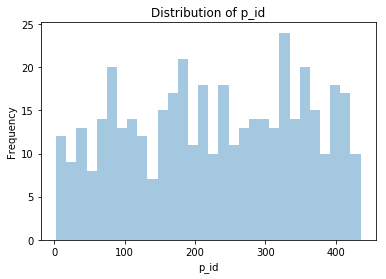

In [83]:
ax = sns.distplot(data['p_id'], bins=30, kde=False)
ax.set_ylabel('Frequency')
ax.set_title('Distribution of p_id')

Text(0.5, 1.0, 'Distribution of course_id')

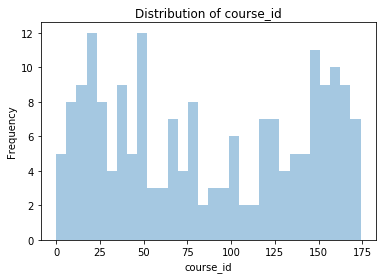

In [84]:
ax = sns.distplot(data['course_id'].dropna(), bins=30, kde=False)
ax.set_ylabel('Frequency')
ax.set_title('Distribution of course_id')

Text(0.5, 1.0, 'Count of Position')

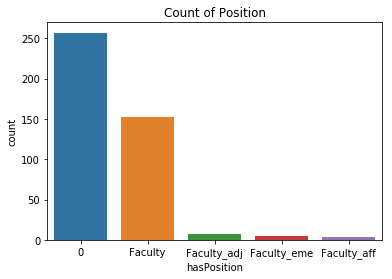

In [59]:
ax = sns.countplot(data['hasPosition'])
ax.set_title('Count of Position')

Text(0.5, 1.0, 'Count of Phase')

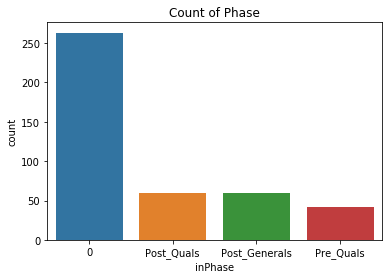

In [61]:
ax = sns.countplot(data['inPhase'])
ax.set_title('Count of Phase')

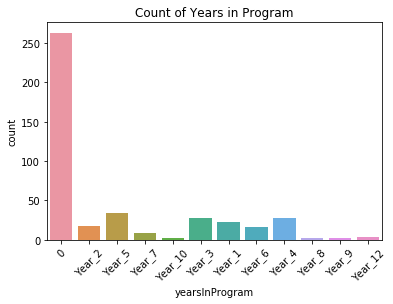

In [66]:
ax = sns.countplot(data['yearsInProgram'])
ax.set_title('Count of Years in Program')
ax.tick_params(axis='x', rotation=45)

Text(0.5, 1.0, 'Count of Course Level')

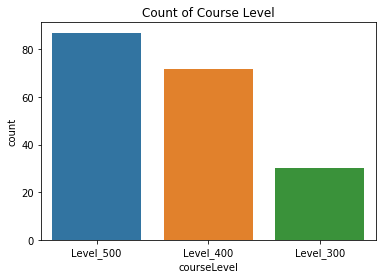

In [67]:
ax = sns.countplot(data['courseLevel'])
ax.set_title('Count of Course Level')